In [1]:

library(tidyverse)
library(ggplot2)
library(viridis)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: viridisLite



In [2]:
all = read.table('../../data/for_figures/circle_plot_info.tsv', header=T)

In [3]:
one <- all[all$species == 'macaque', ] 
two <- all[all$species == 'marmoset', ] 
three <- all[all$species == 'mouse', ] 

In [4]:
head(one)

,all,ortho,cons,species,celltype,order
,<int>,<int>,<int>,<chr>,<chr>,<int>
1,689726,652356,177511,macaque,Astro,20
2,197637,187589,24990,macaque,CLA,11
3,867760,815590,276561,macaque,L23,7
4,533195,501550,168464,macaque,L4,8
5,110542,104745,5680,macaque,L5-ET,12
6,461965,435494,134010,macaque,L5-IT,9


In [5]:
one$epi_specific <- ((one$all-one$ortho)/one$all)*100
one$epi_div <- ((one$ortho-one$cons)/one$all)*100
one$epi_cons <- (one$cons/one$all)*100

In [6]:
two$epi_specific <- ((two$all-two$ortho)/two$all)*100
two$epi_div <- ((two$ortho-two$cons)/two$all)*100
two$epi_cons <- (two$cons/two$all)*100

In [7]:
three$epi_specific <- ((three$all-three$ortho)/three$all)*100
three$epi_div <- ((three$ortho-three$cons)/three$all)*100
three$epi_cons <- (three$cons/three$all)*100

In [8]:
one$all <- NULL
one$ortho <- NULL
one$cons <- NULL
one$celltype <- one$order
one$order <- NULL

two$all <- NULL
two$ortho <- NULL
two$cons <- NULL
two$celltype <- two$order
two$order <- NULL

three$all <- NULL
three$ortho <- NULL
three$cons <- NULL
three$celltype <- three$order
three$order <- NULL

In [9]:
head(two)

,species,celltype,epi_specific,epi_div,epi_cons
,<chr>,<int>,<dbl>,<dbl>,<dbl>
21,marmoset,20,10.49707,62.78073,26.722206
22,marmoset,11,10.35737,80.88010,8.762529
23,marmoset,7,11.71568,66.65760,21.626717
24,marmoset,8,11.19440,68.66437,20.141224
25,marmoset,12,11.08357,80.23104,8.685387
26,marmoset,9,11.00711,63.14656,25.846330


In [10]:
# Transform data in a tidy format (long format)
one <- one %>% gather(key = "observation", value="value", -c(1,2))

two <- two %>% gather(key = "observation", value="value", -c(1,2))

three <- three %>% gather(key = "observation", value="value", -c(1,2))


In [11]:
head(two)

,species,celltype,observation,value
,<chr>,<int>,<chr>,<dbl>
1,marmoset,20,epi_specific,10.49707
2,marmoset,11,epi_specific,10.35737
3,marmoset,7,epi_specific,11.71568
4,marmoset,8,epi_specific,11.19440
5,marmoset,12,epi_specific,11.08357
6,marmoset,9,epi_specific,11.00711


In [12]:
# Set a number of 'empty bar' to add at the end of each group
empty_bar <- 2

nObsType <- nlevels(as.factor(one$observation))
#to_add <- data.frame(matrix(NA, empty_bar*nlevels(data$species)*nObsType, ncol(data)) )
#colnames(to_add) <- colnames(data)
#to_add$species <- rep(levels(data$species), each=empty_bar*nObsType )
#data <- rbind(data, to_add)
one <- one %>% arrange(species, celltype)
one$id <- rep( seq(1, nrow(one)/nObsType) , each=nObsType)

nObsType <- nlevels(as.factor(two$observation))
two <- two %>% arrange(species, celltype)
two$id <- rep( seq(1, nrow(two)/nObsType) , each=nObsType)

nObsType <- nlevels(as.factor(three$observation))
three <- three %>% arrange(species, celltype)
three$id <- rep( seq(1, nrow(three)/nObsType) , each=nObsType)

In [13]:
to_add <- data.frame("NA","NA","NA","NA","NA")

In [14]:
colnames(to_add) <- colnames(one)

In [15]:
one <- rbind(one, to_add, to_add, to_add, to_add, to_add, to_add)
two <- rbind(two, to_add, to_add, to_add, to_add, to_add, to_add)
three <- rbind(three, to_add, to_add, to_add, to_add, to_add, to_add)

In [16]:
data <- rbind(one, two, three)

In [17]:
dim(data)

[1] 198   5

In [18]:
head(three)

,species,celltype,observation,value,id
,<chr>,<chr>,<chr>,<chr>,<chr>
1,mouse,1,epi_specific,43.9281793564441,1
2,mouse,1,epi_div,47.6882730355444,1
3,mouse,1,epi_cons,8.38354760801151,1
4,mouse,2,epi_specific,41.2799283956142,2
5,mouse,2,epi_div,51.6767360334154,2
6,mouse,2,epi_cons,7.04333557097039,2


In [19]:
dim(data)

[1] 198   5

In [22]:
id <- read.table('id', header=T)
data$id <- id$id

In [23]:
data$value <- as.double(data$value)

In [24]:
head(data)

,species,celltype,observation,value,id
,<chr>,<chr>,<chr>,<dbl>,<int>
1,macaque,1,epi_specific,4.092606,1
2,macaque,1,epi_div,62.745237,1
3,macaque,1,epi_cons,33.162158,1
4,macaque,2,epi_specific,3.921086,2
5,macaque,2,epi_div,74.301484,2
6,macaque,2,epi_cons,21.777430,2


In [25]:
# Get the name and the y position of each label
label_data <- data %>% group_by(id, celltype) %>% summarize(tot=sum(value))
number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id-0.5)/number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
label_data$hjust <- ifelse(angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle+180, angle)

`summarise()` has grouped output by 'id'. You can override using the `.groups`
argument.


In [26]:
# prepare a data frame for base lines
base_data <- data %>% 
  group_by(species) %>% 
  summarize(start=min(id), end=max(id) - empty_bar) %>% 
  rowwise() %>% 
  mutate(title=mean(c(start, end)))

In [27]:
#write.table(base_data, file = 'base_data.txt', sep = '\t')

#Manually edit start and end in base_data.txt file

In [28]:
# prepare a data frame for grid (scales)
grid_data <- base_data
#grid_data$end <- grid_data$end[ c( nrow(grid_data), 1:nrow(grid_data)-1)] + 1
grid_data$end <- 65
#grid_data$start <- grid_data$start - 1
grid_data$start <- 0
grid_data <- grid_data[-1,]

In [30]:
base_data <- read.table('base_data.txt',header=T)

In [31]:
# Make the plot
p <- ggplot(data) +      
  
  # Add the stacked bar
  geom_bar(aes(x=as.factor(id), y=value, fill=observation), color="black", stat="identity", alpha=0.6) +
  scale_fill_manual(values = c("epi_specific" = "#FD841F",
                               "epi_cons" = "#CD104D",
                               "epi_div" = "#E14D2A")) +
  #scale_colour_manual(values = c("#F7A76C","#E0D98C","#C3FF99")) +
  
  # Add a val=100/75/50/25 lines. I do it at the beginning to make sur barplots are OVER it.
  geom_segment(data=grid_data, aes(x = end, y = 0, xend = start, yend = 0), colour = "black", alpha=1, size=0.2 , linetype = "dashed", inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 25, xend = start, yend = 25), colour = "black", alpha=1, size=0.2 , linetype = "dashed", inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 50, xend = start, yend = 50), colour = "black", alpha=1, size=0.2 , linetype = "dashed", inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 75, xend = start, yend = 75), colour = "black", alpha=1, size=0.2 , linetype = "dashed", inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 100, xend = start, yend = 100), colour = "black", alpha=1, size=0.2 , linetype = "dashed", inherit.aes = FALSE ) +
  
  # Add text showing the value of each 100/75/50/25 lines
  ggplot2::annotate("text", x = rep(max(data$id),5), y = c(0, 25, 50, 75, 100), label = c("0%", "25%", "50%", "75%", "100%"), color="black", size=5, angle=0, hjust=0.7) +
  
  ylim(-150,max(label_data$tot, na.rm=T)) +
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm") 
  ) +
  coord_polar() +
  
  # Add labels on top of each bar
  #geom_text(data=label_data, aes(x=id, y=100, label=celltype, hjust=hjust), color="black", fontface="bold", alpha=0.6, size=4, angle= label_data$angle, inherit.aes = FALSE ) +
  
  # Add base line information
  geom_segment(data=base_data, aes(x = start, y = -5, xend = end, yend = -5), colour="black", alpha=1, size=0.8, inherit.aes = FALSE )
  #geom_text(data=base_data, aes(x = title, y = -30, label=species), hjust=c(0.75,0.65,0.3,5), colour = "black", alpha=0.8, size=5, fontface="bold", inherit.aes = FALSE)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


Warning message:
“Removed 18 rows containing missing values (`position_stack()`).”
Saving 6.67 x 6.67 in image
Warning message:
“Removed 18 rows containing missing values (`position_stack()`).”


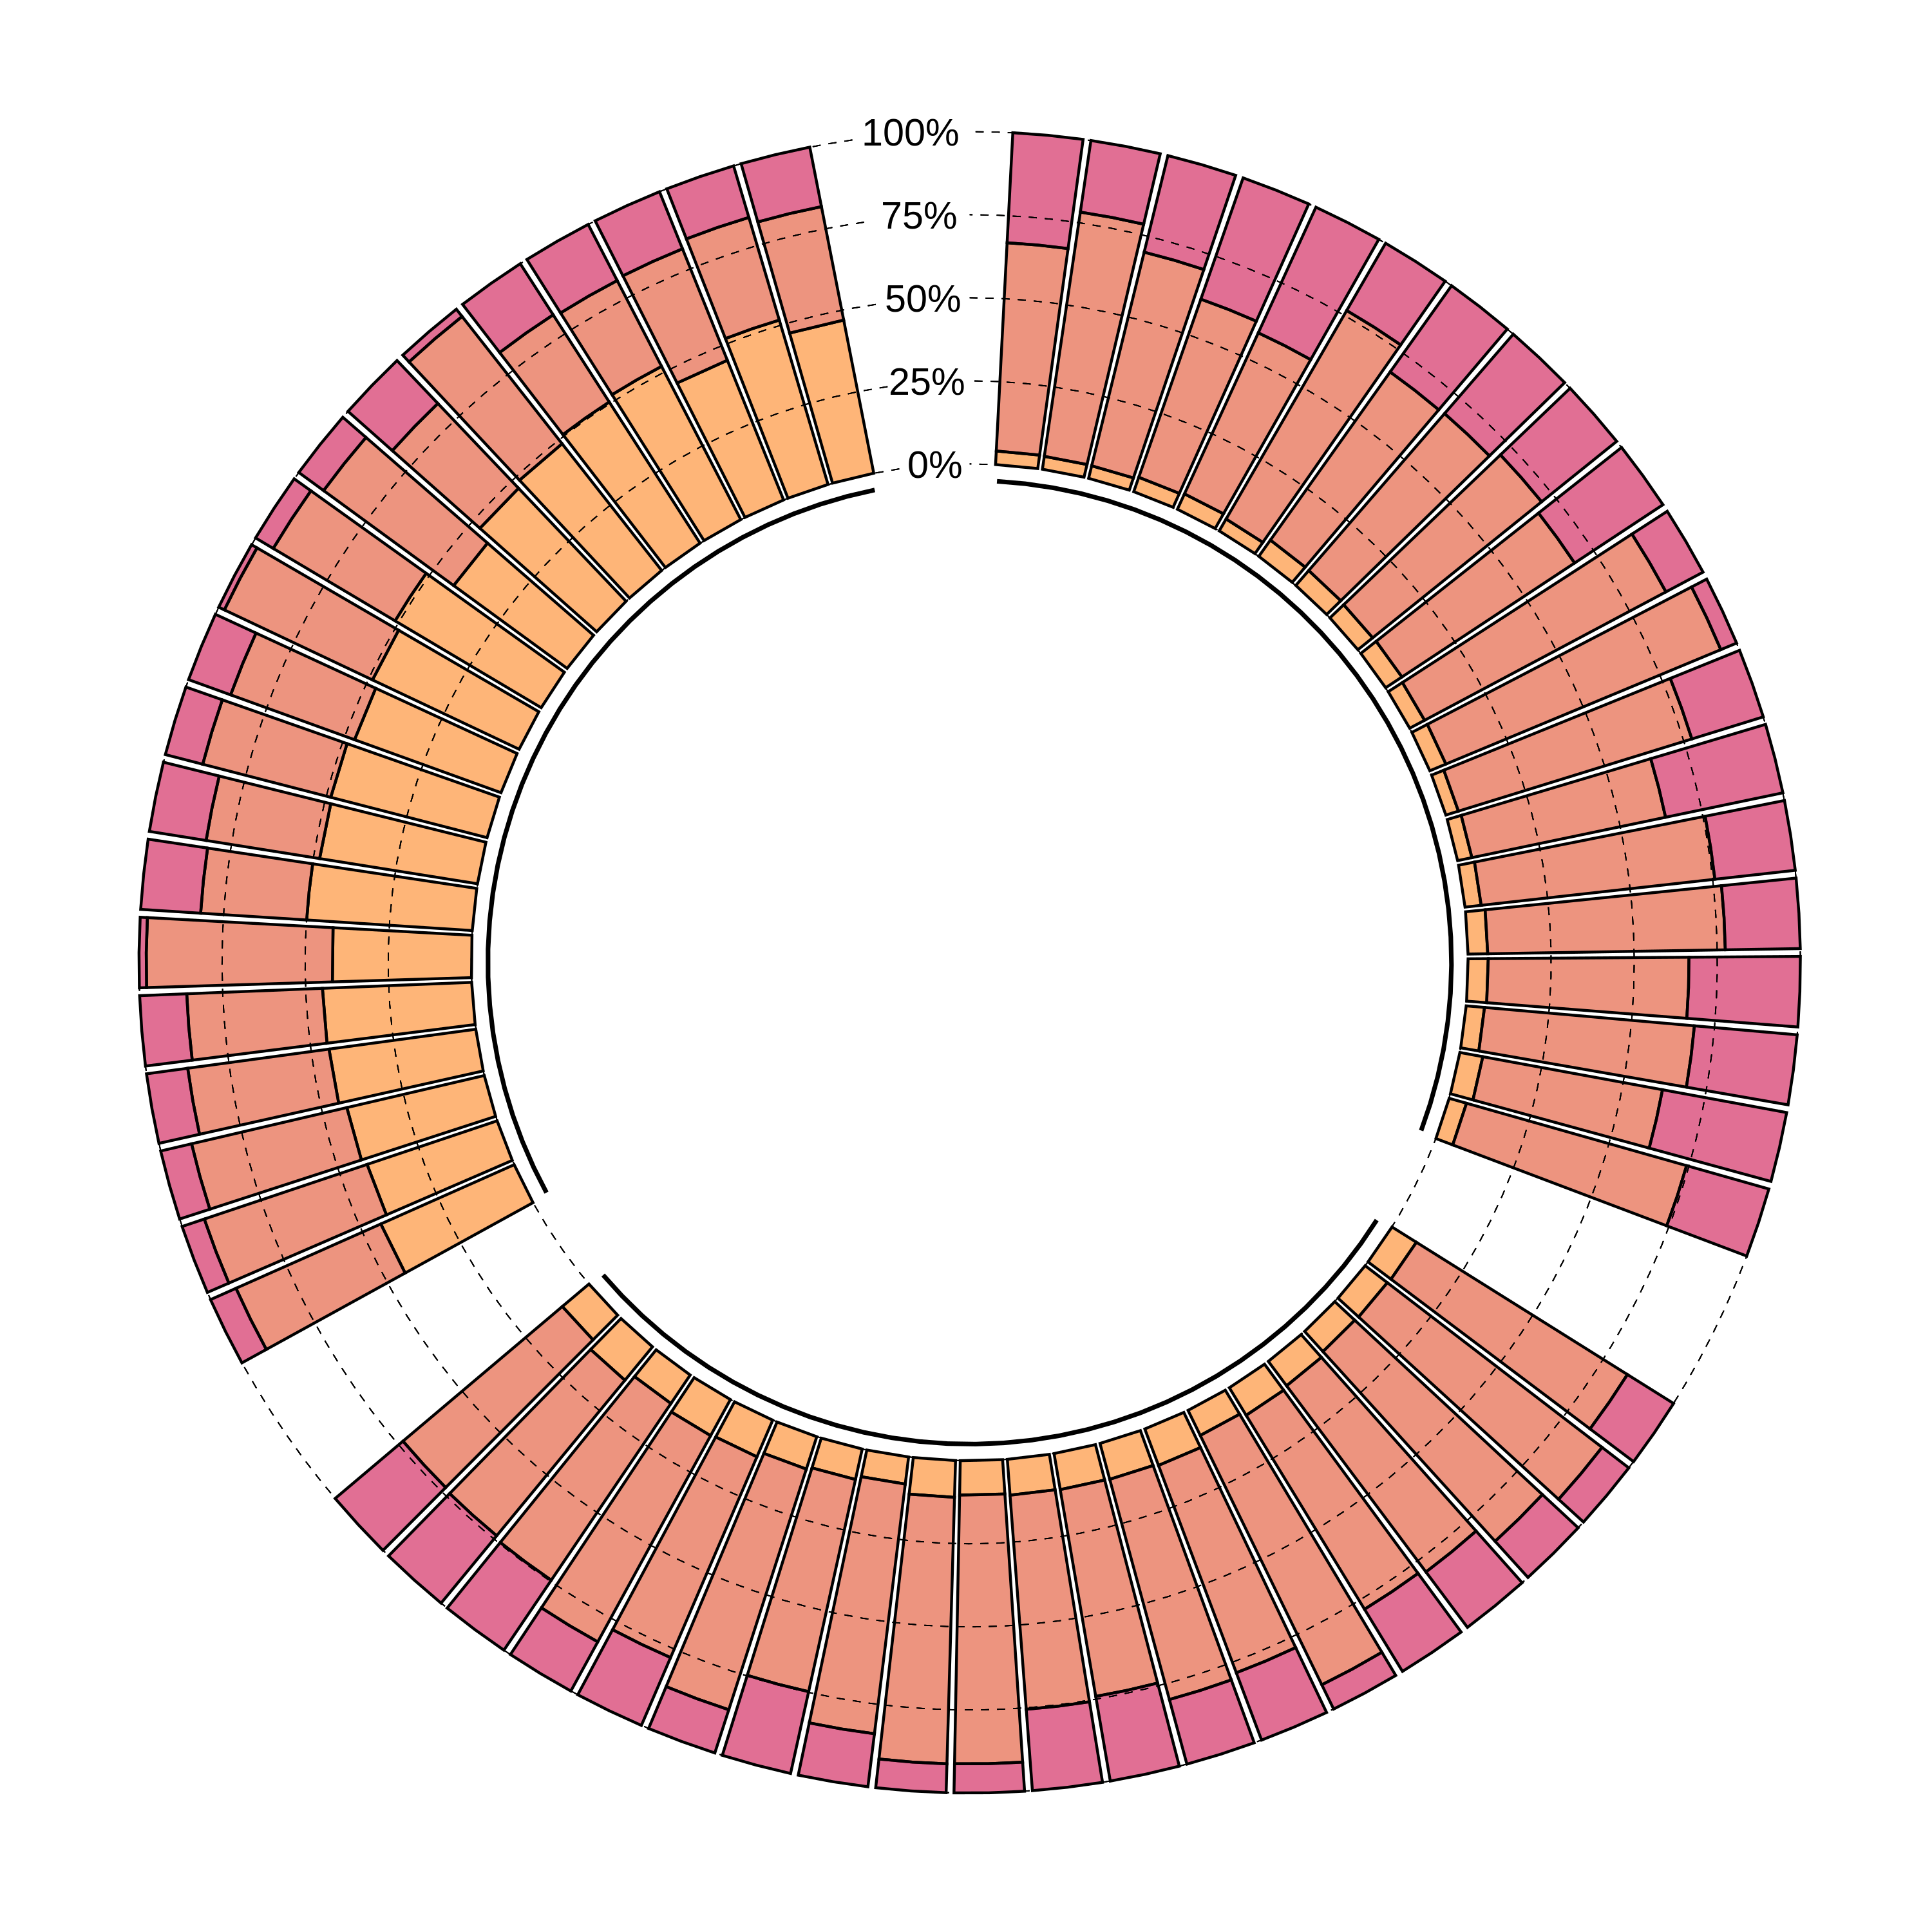

In [35]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)
p
ggsave('../../figures/dmr_circleplot.png', dpi=400, bg='transparent')